# Unsupervised Learning: Clustering Volatility Patterns

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import data from csv file
df = pd.read_csv('/Users/jeanstibel/Documents/AI Classes/Projects/project_02/Resources/df_top_10.csv')
df

,date,crypto_id,open,close,high,low,volume,number_of_trades,diff_oc,return,volatility,vol_change,ma_5,ma_10,price_movement
0,2020-09-22,AVAX,0.8500,5.3193,7.0000,0.8500,31441883.16,375884,4.4693,525.800000,723.529412,0.000000,0.00000,0.0000,1
1,2020-09-23,AVAX,5.3279,3.5350,5.3600,3.4000,12620608.01,168336,-1.7929,-33.651157,36.787477,-59.860521,0.00000,0.0000,0
2,2020-09-24,AVAX,3.5305,4.6411,4.8873,3.4033,7107843.86,104806,1.1106,31.457301,42.033706,-43.680654,0.00000,0.0000,1
3,2020-09-25,AVAX,4.6366,4.7134,5.0234,4.2001,3886096.71,78381,0.0768,1.656386,17.756546,-45.326645,0.00000,0.0000,1
4,2020-09-26,AVAX,4.7164,4.5200,4.8200,4.3294,1814932.97,34016,-0.1964,-4.164193,10.402002,-53.296763,4.54576,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31298,2025-02-11,UNI,9.4580,9.3810,10.0450,9.2440,4512785.82,218968,-0.0770,-0.814126,8.469021,18.700349,9.22360,9.2585,0
31299,2025-02-12,UNI,9.3800,9.9510,10.1340,9.0780,4120586.55,232695,0.5710,6.087420,11.257996,-8.690846,9.41180,9.3352,1
31300,2025-02-13,UNI,9.9550,9.8890,10.0820,9.4640,2294003.23,141858,-0.0660,-0.662983,6.207936,-44.328236,9.56180,9.3285,0
31301,2025-02-14,UNI,9.8910,10.0560,10.3550,9.8040,2559408.74,139194,0.1650,1.668183,5.570721,11.569535,9.74700,9.4272,1


In [5]:
# Generate summary statistics
df.describe()

,open,close,high,low,volume,number_of_trades,diff_oc,return,volatility,vol_change,ma_5,ma_10,price_movement
count,31303.000000,31303.000000,31303.000000,31303.000000,3.130300e+04,3.130300e+04,31303.000000,31303.000000,31303.000000,31303.000000,31303.000000,31303.000000,31303.000000
mean,2477.972712,2480.959332,2537.854969,2414.365943,4.230045e+11,3.285222e+05,2.986620,0.336678,9.489987,19.047803,2474.418986,2466.306780,0.496534
std,10618.773168,10632.451118,10862.805569,10363.946183,4.056802e+12,9.724963e+05,336.266979,11.011422,38.784224,142.524025,10601.212407,10563.214647,0.499996
min,0.000006,0.000006,0.000006,0.000005,2.281081e+02,1.120000e+02,-7038.700000,-53.461218,0.339122,-97.496585,0.000000,0.000000,0.000000
25%,0.225950,0.226100,0.234450,0.215800,1.632117e+06,1.931850e+04,-0.038100,-2.769548,4.698249,-28.692520,0.222980,0.220890,0.000000
50%,1.517000,1.517200,1.594000,1.420000,7.980955e+06,6.316800e+04,0.000000,0.000000,7.085190,-3.331606,1.486600,1.456300,0.000000
75%,10.881000,10.885500,11.440000,10.303500,3.803165e+07,1.990995e+05,0.035000,2.692802,10.868856,34.749098,10.764800,10.675000,1.000000
max,106143.820000,106143.820000,109588.000000,105321.490000,2.461043e+14,1.874743e+07,8277.980000,1053.900000,4900.000000,9500.718464,104675.634000,103822.346000,1.000000


In [6]:
# check for nan values
df.isnull().sum()

date                0
crypto_id           0
open                0
close               0
high                0
low                 0
volume              0
number_of_trades    0
diff_oc             0
return              0
volatility          0
vol_change          0
ma_5                0
ma_10               0
price_movement      0
dtype: int64

In [7]:
# Select features for clustering
features = ['volatility', 'return', 'volume', 'diff_oc', 'ma_5', 'ma_10']
df_features = df[features].dropna()

In [8]:
# Use StandardScaler for the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

In [9]:
# Reducing using PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

In [10]:
# KMeans Clustering - Finding Elbow Method
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_features)
    inertia.append(kmeans.inertia_)

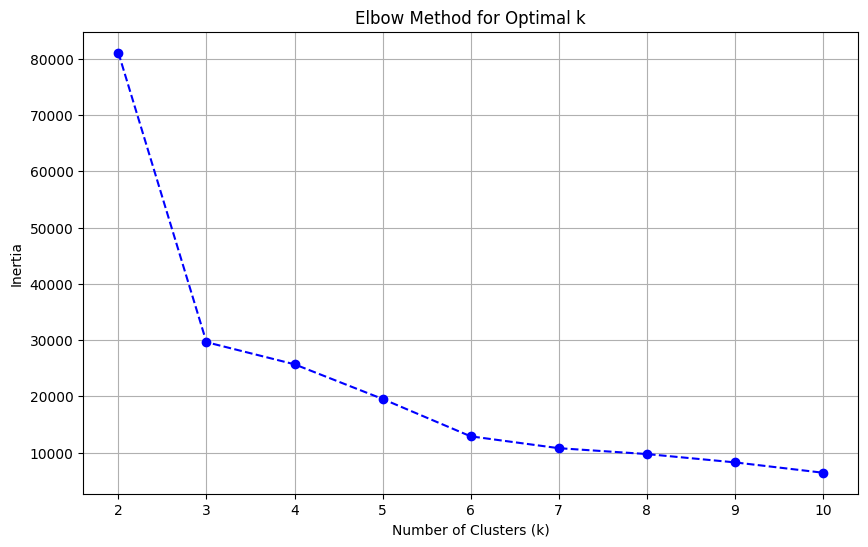

In [11]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [12]:
# Optimal number of clusters (choose based on the elbow plot)
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_features)

In [13]:
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(reduced_features)

In [14]:
# BIRCH Clustering
birch = Birch(n_clusters=optimal_k)
birch_labels = birch.fit_predict(reduced_features)

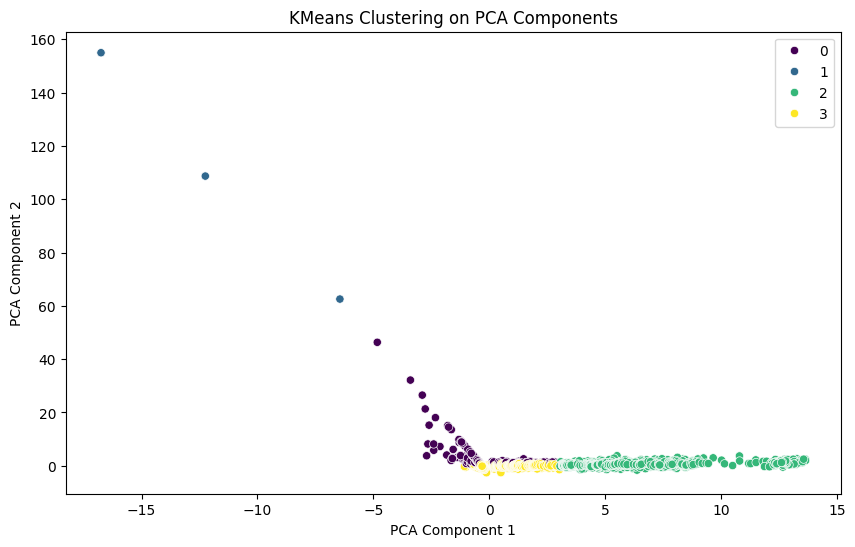

In [15]:
# Plot KMeans Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=kmeans_labels, palette='viridis', legend='full')
plt.title('KMeans Clustering on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

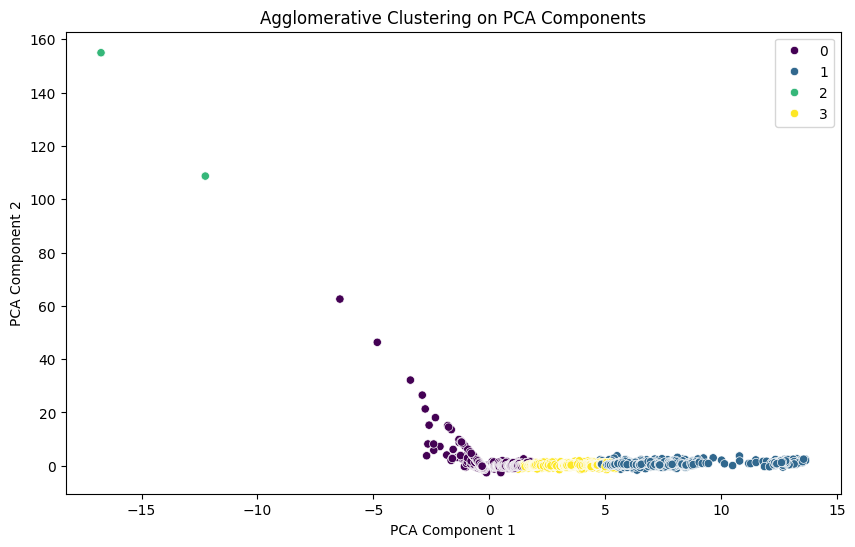

In [16]:
# Plot Agglomerative Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=agglo_labels, palette='viridis', legend='full')
plt.title('Agglomerative Clustering on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

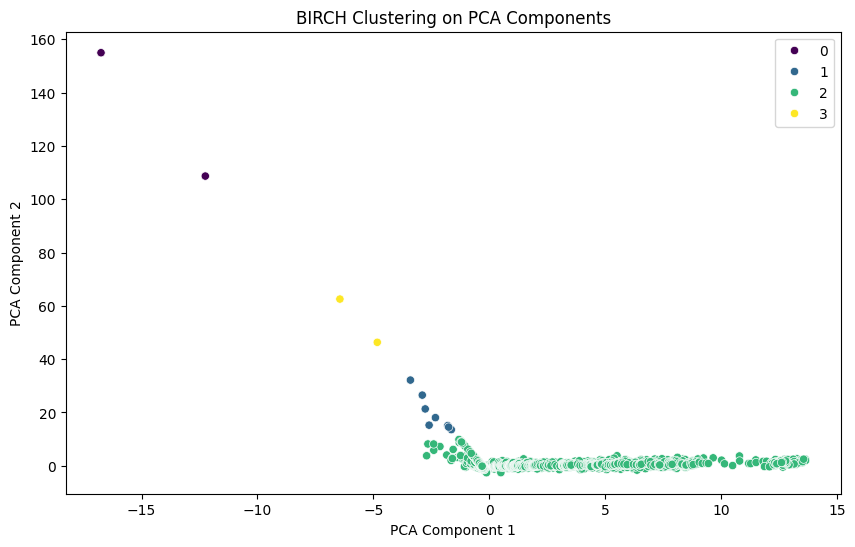

In [17]:
# Plot BIRCH Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=birch_labels, palette='viridis', legend='full')
plt.title('BIRCH Clustering on PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

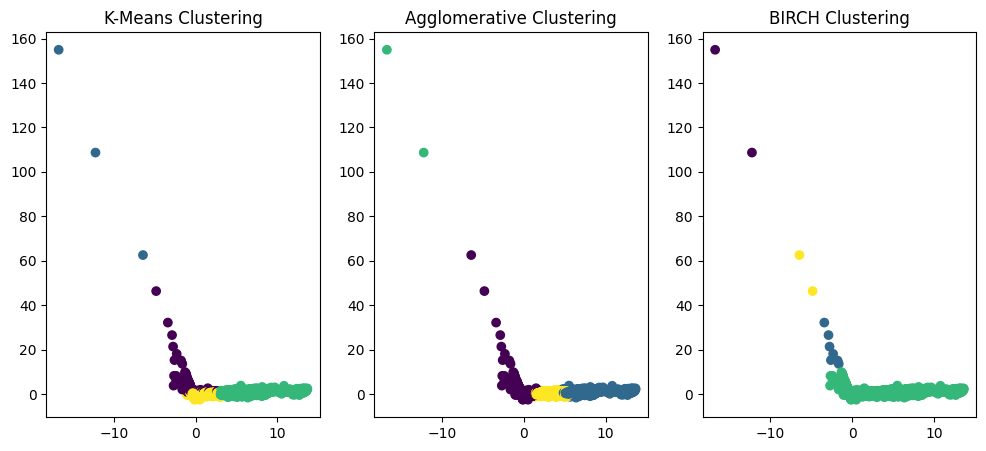

In [18]:
# Plot K-Means Clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

# Plot Agglomerative Clusters
plt.subplot(1, 3, 2)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=agglo_labels, cmap='viridis')
plt.title('Agglomerative Clustering')

# Plot BIRCH Clusters
plt.subplot(1, 3, 3)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=birch_labels, cmap='viridis')
plt.title('BIRCH Clustering')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Compute evaluation metrics
silhouette_kmeans = silhouette_score(reduced_features, kmeans_labels)
silhouette_agglo = silhouette_score(reduced_features, agglo_labels)
silhouette_birch = silhouette_score(reduced_features, birch_labels)

davies_kmeans = davies_bouldin_score(reduced_features, kmeans_labels)
davies_agglo = davies_bouldin_score(reduced_features, agglo_labels)
davies_birch = davies_bouldin_score(reduced_features, birch_labels)

calinski_kmeans = calinski_harabasz_score(reduced_features, kmeans_labels)
calinski_agglo = calinski_harabasz_score(reduced_features, agglo_labels)
calinski_birch = calinski_harabasz_score(reduced_features, birch_labels)

# Print results
print("Clustering Evaluation Metrics:")
print(f"KMeans - Silhouette Score: {silhouette_kmeans:.4f}, Davies-Bouldin Index: {davies_kmeans:.4f}, Calinski-Harabasz Index: {calinski_kmeans:.4f}")
print(f"Agglomerative - Silhouette Score: {silhouette_agglo:.4f}, Davies-Bouldin Index: {davies_agglo:.4f}, Calinski-Harabasz Index: {calinski_agglo:.4f}")
print(f"BIRCH - Silhouette Score: {silhouette_birch:.4f}, Davies-Bouldin Index: {davies_birch:.4f}, Calinski-Harabasz Index: {calinski_birch:.4f}")


Clustering Evaluation Metrics:
KMeans - Silhouette Score: 0.7163, Davies-Bouldin Index: 0.5365, Calinski-Harabasz Index: 36760.2735
Agglomerative - Silhouette Score: 0.8373, Davies-Bouldin Index: 0.4407, Calinski-Harabasz Index: 39563.6439
BIRCH - Silhouette Score: 0.9492, Davies-Bouldin Index: 0.3755, Calinski-Harabasz Index: 6416.4139


## Notes:
- The silhouette_score function from the sklearn.metrics module computes the mean Silhouette Coefficient of all samples.

- The davies_bouldin_score function from the sklearn.metrics module computes the Davies-Bouldin Index, which is another metric used to evaluate the quality of clustering. The Davies-Bouldin Index is defined as the average similarity ratio of each cluster with its most similar cluster, where similarity is a measure that takes into account both the cluster's dispersion and the distance between clusters. A lower Davies-Bouldin Index indicates better clustering.

- The calinski_harabasz_score function from the sklearn.metrics module computes the Calinski-Harabasz Index, which is another metric used to evaluate the quality of clustering. The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, is defined as the ratio of the sum of between-cluster dispersion and within-cluster dispersion. A higher Calinski-Harabasz Index indicates better-defined clusters.